In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
raw_data =  pd.read_excel('소프트맥스.xlsx')
raw_data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1,power_cat
0,1,2020-06-01 00,8179.056,17.6,2.5,92,0.8,0.0,1,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91,0.3,0.0,1,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91,0.0,0.0,1,0,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91,0.0,0.0,1,0,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92,0.0,0.0,1,0,0
5,1,2020-06-01 05,8010.576,16.9,3.4,93,0.0,0.0,1,0,0
6,1,2020-06-01 06,7978.176,16.7,3.4,90,0.1,0.0,1,0,0
7,1,2020-06-01 07,8019.000,16.9,2.3,86,0.0,0.1,1,0,0
8,1,2020-06-01 08,8020.944,17.8,3.3,80,0.0,0.3,0,1,0
9,1,2020-06-01 09,8083.152,19.3,2.1,73,0.0,0.7,0,1,0


In [3]:
raw_data = raw_data.drop('num',axis=1)
raw_data = raw_data.drop('전력사용량(kWh)',axis=1)
raw_data = raw_data.drop('date_time',axis=1)

In [4]:
raw_data = raw_data.reset_index()
raw_data = raw_data.drop(['index'], axis=1)
raw_data

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1,power_cat
0,17.6,2.5,92,0.8,0.0,1,0,0
1,17.7,2.9,91,0.3,0.0,1,0,0
2,17.5,3.2,91,0.0,0.0,1,0,0
3,17.1,3.2,91,0.0,0.0,1,0,0
4,17.0,3.3,92,0.0,0.0,1,0,0
5,16.9,3.4,93,0.0,0.0,1,0,0
6,16.7,3.4,90,0.1,0.0,1,0,0
7,16.9,2.3,86,0.0,0.1,1,0,0
8,17.8,3.3,80,0.0,0.3,0,1,0
9,19.3,2.1,73,0.0,0.7,0,1,0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 8 columns):
기온(°C)       2040 non-null float64
풍속(m/s)      2040 non-null float64
습도(%)        2040 non-null int64
강수량(mm)      2040 non-null float64
일조(hr)       2040 non-null float64
time_0       2040 non-null int64
time_1       2040 non-null int64
power_cat    2040 non-null int64
dtypes: float64(4), int64(4)
memory usage: 127.6 KB


In [6]:
train_pre = raw_data[['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','time_0','time_1']]
train_pre

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1
0,17.6,2.5,92,0.8,0.0,1,0
1,17.7,2.9,91,0.3,0.0,1,0
2,17.5,3.2,91,0.0,0.0,1,0
3,17.1,3.2,91,0.0,0.0,1,0
4,17.0,3.3,92,0.0,0.0,1,0
5,16.9,3.4,93,0.0,0.0,1,0
6,16.7,3.4,90,0.1,0.0,1,0
7,16.9,2.3,86,0.0,0.1,1,0
8,17.8,3.3,80,0.0,0.3,0,1
9,19.3,2.1,73,0.0,0.7,0,1


In [7]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_pre, #데이터프레임의 속성들
                 raw_data['power_cat'], #맞추어야할 정답
                 test_size = 0.2, #테스트데이터 20%지정, 훈련데이터 80%할당
                 stratify = raw_data['power_cat'],
                 shuffle = True,
                 random_state = 13, #seed값                                                                                   
                )

In [9]:
import tensorflow as tf

In [10]:
X_train1 = X_train.values
y_train1 = y_train.values
X_test1 = X_test.values
y_test1 = y_test.values

In [11]:
X_train1 = MinMaxScaler().fit_transform(X_train1)
X_test1 = MinMaxScaler().fit_transform(X_test1)

In [13]:
nb_classes = 3
y_train1_hot = tf.keras.utils.to_categorical(y_train1, nb_classes)
y_test1_hot = tf.keras.utils.to_categorical(y_test1, nb_classes)

In [43]:
learning_rate = 0.01

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=7, units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()


# tf.model = tf.keras.Sequential()
# # add() 메서드를 통해 Sequential 모델
# tf.model.add(tf.keras.layers.Dense(100, activation='relu', input_dim=7))
# tf.model.add(tf.keras.layers.Dense(100, activation='relu'))
# tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
# # tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=7, activation='softmax'))
# tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 771       
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = tf.model.fit(X_train1, y_train1_hot, epochs=50)

Epoch 1/50
51/51 [==============================] - ETA: 23s - loss: 1.1004 - accuracy: 0.375 - ETA: 0s - loss: 1.0757 - accuracy: 0.419 - ETA: 0s - loss: 1.0031 - accuracy: 0.48 - 1s 3ms/step - loss: 0.9709 - accuracy: 0.5129
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.7663 - accuracy: 0.56 - ETA: 0s - loss: 0.8186 - accuracy: 0.59 - ETA: 0s - loss: 0.8200 - accuracy: 0.60 - 0s 2ms/step - loss: 0.8166 - accuracy: 0.6042
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.68 - ETA: 0s - loss: 0.8005 - accuracy: 0.62 - ETA: 0s - loss: 0.8329 - accuracy: 0.61 - 0s 2ms/step - loss: 0.8302 - accuracy: 0.6195
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.7232 - accuracy: 0.71 - ETA: 0s - loss: 0.7885 - accuracy: 0.62 - ETA: 0s - loss: 0.7991 - accuracy: 0.62 - 0s 2ms/step - loss: 0.8002 - accuracy: 0.6268
Epoch 5/50
51/51 [==============================] - ETA: 0s - loss: 0.7867 - accuracy: 0.68 - ETA: 0s

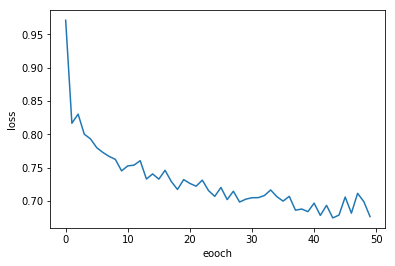

In [45]:
plt.plot(history.history['loss'])
plt.xlabel('eooch')
plt.ylabel('loss')
plt.show()


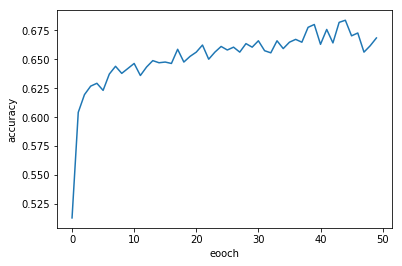

In [46]:
plt.plot(history.history['accuracy'])
plt.xlabel('eooch')
plt.ylabel('accuracy')
plt.show()

In [47]:
# predict
pred = tf.model.predict_classes(X_test1)
for p, y in zip(pred, y_test1.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

# Calculate the accuracy
print("Accuracy: ", tf.model.evaluate(X_test1, y_test1_hot)[1])  

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[False] Prediction: 1 True Y: 2
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 2 True Y: 2
